In [1]:
# Import necessary functions from scripts
from scripts.db import retrieve_data_from_database
from scripts.user_analysis import aggregate_engagement_metrics
from scripts.data_processing import  normalize_engagement_metrics
from scripts.clustering import apply_kmeans_clustering, elbow_method
from scripts.visualization import plot_top_apps, plot_elbow_method

In [2]:
# Step 1: Load data from the database
df = retrieve_data_from_database()

In [3]:
# Step 2: Aggregate engagement metrics per customer ID (MSISDN)
engagement_metrics = aggregate_engagement_metrics(df)

In [4]:
# Step 3: Normalize the engagement metrics
normalized_metrics = normalize_engagement_metrics(engagement_metrics)

In [5]:
# Step 4: Apply k-means clustering
engagement_metrics_with_cluster, kmeans = apply_kmeans_clustering(normalized_metrics, n_clusters=3)

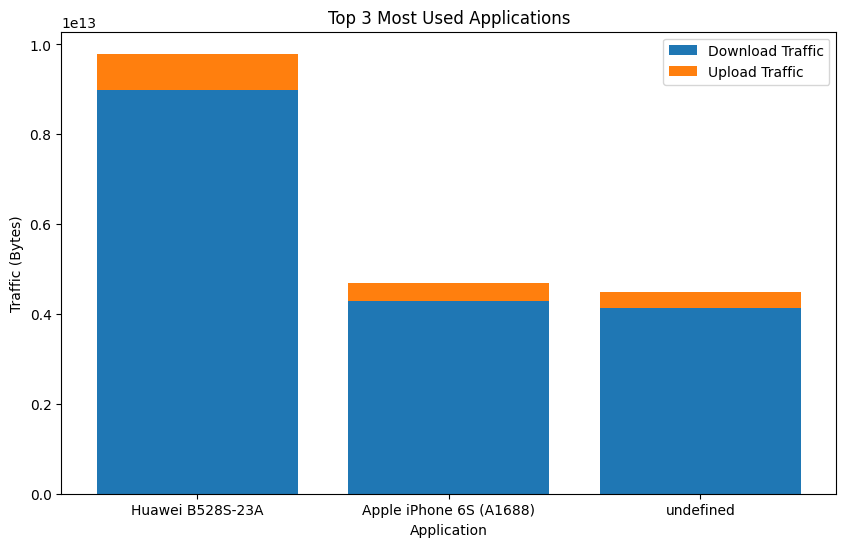

In [6]:
# Step 5: Plot the top 3 most used applications
plot_top_apps(df)

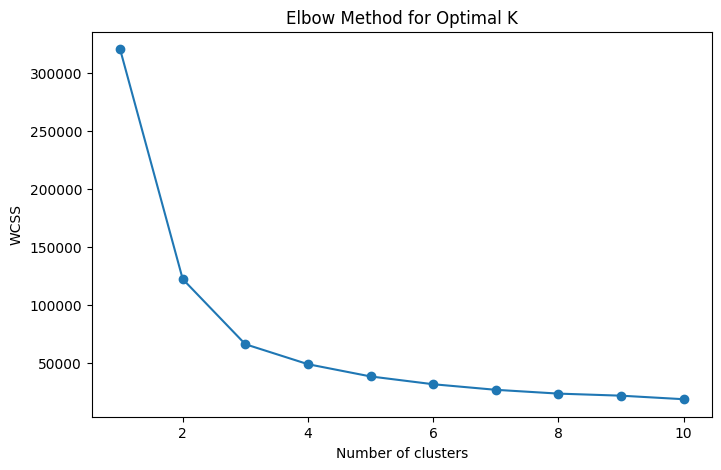

In [7]:
# Step 6: Use the elbow method to determine the optimal number of clusters
wcss = elbow_method(normalized_metrics)
plot_elbow_method(wcss)

In [8]:
# Step 7: Print cluster summary (optional)
cluster_summary = engagement_metrics_with_cluster.groupby('cluster').agg(
    min_frequency=('session_frequency', 'min'),
    max_frequency=('session_frequency', 'max'),
    avg_frequency=('session_frequency', 'mean'),
    total_frequency=('session_frequency', 'sum'),
    min_duration=('session_duration', 'min'),
    max_duration=('session_duration', 'max'),
    avg_duration=('session_duration', 'mean'),
    total_duration=('session_duration', 'sum'),
    min_traffic=('total_traffic', 'min'),
    max_traffic=('total_traffic', 'max'),
    avg_traffic=('total_traffic', 'mean'),
    total_traffic=('total_traffic', 'sum')
).reset_index()

print(cluster_summary)


   cluster  min_frequency  max_frequency  avg_frequency  total_frequency  \
0        0       0.352027       9.714466       0.986244     11479.875414   
1        1     288.247043     288.247043     288.247043       288.247043   
2        2      -0.233126       1.522332      -0.123594    -11768.122457   

   min_duration  max_duration  avg_duration  total_duration  min_traffic  \
0     -0.441409     24.218848      1.529799    17806.861552    -0.568111   
1    199.607211    199.607211    199.607211      199.607211   274.494897   
2     -0.801677      1.292979     -0.189112   -18006.468763    -0.729888   

   max_traffic  avg_traffic  total_traffic  
0     9.015770     0.986013   11477.194184  
1   274.494897   274.494897     274.494897  
2     1.493045    -0.123421  -11751.689081  
